<a href="https://colab.research.google.com/github/mcslender97/PySparl-practice/blob/main/Marvel_superheroes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
!pip install pandas_bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 2.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=110c9628130367c083b67cfc502c2d717001ad57e7c2ef632557d4dc8a73b605
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyspark.pandas as ps
import os
import pandas as pd
import numpy as np
import pandas_bokeh

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
spark

In [ ]:
df = spark.read.csv('/content/charcters_stats.csv',header=True, inferSchema=True) #read csv

In [ ]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Alignment: string (nullable = true)
 |-- Intelligence: integer (nullable = true)
 |-- Strength: integer (nullable = true)
 |-- Speed: integer (nullable = true)
 |-- Durability: integer (nullable = true)
 |-- Power: integer (nullable = true)
 |-- Combat: integer (nullable = true)
 |-- Total: integer (nullable = true)



In [ ]:
df.dtypes

[('Name', 'string'),
 ('Alignment', 'string'),
 ('Intelligence', 'int'),
 ('Strength', 'int'),
 ('Speed', 'int'),
 ('Durability', 'int'),
 ('Power', 'int'),
 ('Combat', 'int'),
 ('Total', 'int')]

In [ ]:
df.summary()

DataFrame[summary: string, Name: string, Alignment: string, Intelligence: string, Strength: string, Speed: string, Durability: string, Power: string, Combat: string, Total: string]

In [ ]:
df.show()

+-----------------+---------+------------+--------+-----+----------+-----+------+-----+
|             Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-----------------+---------+------------+--------+-----+----------+-----+------+-----+
|          3-D Man|     good|          50|      31|   43|        32|   25|    52|  233|
|           A-Bomb|     good|          38|     100|   17|        80|   17|    64|  316|
|       Abe Sapien|     good|          88|      14|   35|        42|   35|    85|  299|
|         Abin Sur|     good|          50|      90|   53|        64|   84|    65|  406|
|      Abomination|      bad|          63|      80|   53|        90|   55|    95|  436|
|          Abraxas|      bad|          88|     100|   83|        99|  100|    56|  526|
|      Adam Monroe|     good|          63|      10|   12|       100|   71|    64|  320|
|     Adam Strange|     good|           1|       1|    1|         1|    0|     1|    5|
|        Agent  13|     good|   

In [ ]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----+---------+------------+--------+-----+----------+-----+------+-----+
|Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+----+---------+------------+--------+-----+----------+-----+------+-----+
|   0|        3|           0|       0|    0|         0|    0|     0|    0|
+----+---------+------------+--------+-----+----------+-----+------+-----+



In [ ]:
from pyspark.sql import functions as F

cols = df.columns

counts_df = df.select([
    F.countDistinct(*cols).alias('n_unique'),
    F.count('*').alias('n_rows')
])
n_unique, n_rows = counts_df.collect()[0]
print(n_unique)
print(n_rows)

608
611


In [ ]:
pdf = ps.DataFrame(df)
pdf

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
6,Adam Monroe,good,63,10,12,100,71,64,320
7,Adam Strange,good,1,1,1,1,0,1,5
8,Agent 13,good,1,1,1,1,0,1,5
9,Agent Bob,good,10,8,13,5,5,20,61


In [ ]:
df.show(1) # first record

+-------+---------+------------+--------+-----+----------+-----+------+-----+
|   Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-------+---------+------------+--------+-----+----------+-----+------+-----+
|3-D Man|     good|          50|      31|   43|        32|   25|    52|  233|
+-------+---------+------------+--------+-----+----------+-----+------+-----+
only showing top 1 row



In [ ]:
print(df.count(), len(df.columns))# no of row and columns

611 9


In [ ]:
df.groupby('Alignment').count().show()# all values of alignments

+---------+-----+
|Alignment|count|
+---------+-----+
|     null|    3|
|  neutral|   11|
|      bad|  165|
|     good|  432|
+---------+-----+



In [ ]:
df.filter("Alignment='good'").show()
df.where(df.Alignment=="good").show()# Show super heroes with Good Alignments

+-----------------+---------+------------+--------+-----+----------+-----+------+-----+
|             Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-----------------+---------+------------+--------+-----+----------+-----+------+-----+
|          3-D Man|     good|          50|      31|   43|        32|   25|    52|  233|
|           A-Bomb|     good|          38|     100|   17|        80|   17|    64|  316|
|       Abe Sapien|     good|          88|      14|   35|        42|   35|    85|  299|
|         Abin Sur|     good|          50|      90|   53|        64|   84|    65|  406|
|      Adam Monroe|     good|          63|      10|   12|       100|   71|    64|  320|
|     Adam Strange|     good|           1|       1|    1|         1|    0|     1|    5|
|        Agent  13|     good|           1|       1|    1|         1|    0|     1|    5|
|        Agent Bob|     good|          10|       8|   13|         5|    5|    20|   61|
|       Agent Zero|     good|   

In [ ]:
df.filter("Alignment='good'").show(5)#Top 5 of good heroes alignment

+-----------+---------+------------+--------+-----+----------+-----+------+-----+
|       Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-----------+---------+------------+--------+-----+----------+-----+------+-----+
|    3-D Man|     good|          50|      31|   43|        32|   25|    52|  233|
|     A-Bomb|     good|          38|     100|   17|        80|   17|    64|  316|
| Abe Sapien|     good|          88|      14|   35|        42|   35|    85|  299|
|   Abin Sur|     good|          50|      90|   53|        64|   84|    65|  406|
|Adam Monroe|     good|          63|      10|   12|       100|   71|    64|  320|
+-----------+---------+------------+--------+-----+----------+-----+------+-----+
only showing top 5 rows



In [ ]:
df.filter("Alignment='good'").sort("Speed",ascending=False).show(5)# top 5 record of top speed heroes

+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|          Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|       Impulse|     good|          50|      10|  100|        60|   63|    60|  343|
|          Nova|     good|          38|      60|  100|       100|  100|    25|  423|
|Jack of Hearts|     good|          63|      55|  100|        30|   70|    30|  348|
|      Flash II|     good|          63|      10|  100|        60|   66|    32|  331|
|     Flash III|     good|          63|      10|  100|        60|   83|    32|  348|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+
only showing top 5 rows



In [ ]:
df.sort("Power",ascending=False).show(5)# Top 5 heroes with highest power

+-------------+---------+------------+--------+-----+----------+-----+------+-----+
|         Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-------------+---------+------------+--------+-----+----------+-----+------+-----+
|Beta Ray Bill|     good|          63|      80|   35|        95|  100|    84|  457|
|     Darkseid|      bad|          88|     100|   23|       100|  100|    95|  506|
|     Beyonder|     good|          88|     100|   23|       100|  100|    56|  467|
|   Air-Walker|      bad|          50|      85|  100|        85|  100|    40|  460|
|   Black Bolt|     good|          75|      67|  100|        84|  100|    56|  482|
+-------------+---------+------------+--------+-----+----------+-----+------+-----+
only showing top 5 rows



In [ ]:
df.filter("Power=100").count()# how many heroes with 100 power

55

In [ ]:
df.filter("Power=100").show()# Show them

+---------------+---------+------------+--------+-----+----------+-----+------+-----+
|           Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+---------------+---------+------------+--------+-----+----------+-----+------+-----+
|        Abraxas|      bad|          88|     100|   83|        99|  100|    56|  526|
|     Air-Walker|      bad|          50|      85|  100|        85|  100|    40|  460|
|          Amazo|      bad|          75|     100|  100|       100|  100|   100|  575|
|   Anti-Monitor|      bad|          88|      90|   38|        90|  100|    90|  496|
|     Apocalypse|      bad|         100|     100|   33|       100|  100|    60|  493|
|  Beta Ray Bill|     good|          63|      80|   35|        95|  100|    84|  457|
|       Beyonder|     good|          88|     100|   23|       100|  100|    56|  467|
|     Black Bolt|     good|          75|      67|  100|        84|  100|    56|  482|
|          Cable|     good|          88|      48|   23

In [ ]:
df.filter("Alignment='good'").sort("Power",ascending=False).show(5)

+------------+---------+------------+--------+-----+----------+-----+------+-----+
|        Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+------------+---------+------------+--------+-----+----------+-----+------+-----+
|Dr Manhattan|     good|          88|      32|   42|        95|  100|    42|  399|
|       Cable|     good|          88|      48|   23|        56|  100|    80|  395|
|  Black Bolt|     good|          75|      67|  100|        84|  100|    56|  482|
| Doctor Fate|     good|          81|      16|   25|        80|  100|    50|  352|
|     Deadman|     good|          50|      10|   33|       100|  100|    42|  335|
+------------+---------+------------+--------+-----+----------+-----+------+-----+
only showing top 5 rows



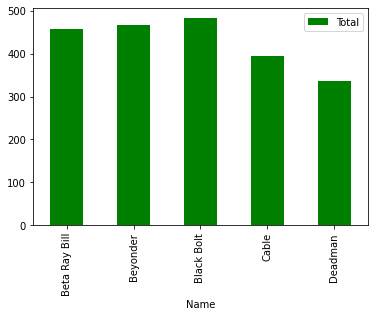

In [ ]:
# Draw a bar plot of all super heroes who are having good alignment and max power of top five only , take same object of point 13 , show name and total in plot with green bars
df1=df.filter("Alignment='good'").sort("Power",ascending=False).toPandas().head(5)
df1=df1[['Name','Total']].reset_index(drop=True)
df1.plot.bar(x='Name',color='green')

In [ ]:
df.filter("Alignment='bad'").show() # All villians

+-------------+---------+------------+--------+-----+----------+-----+------+-----+
|         Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-------------+---------+------------+--------+-----+----------+-----+------+-----+
|  Abomination|      bad|          63|      80|   53|        90|   55|    95|  436|
|      Abraxas|      bad|          88|     100|   83|        99|  100|    56|  526|
|   Air-Walker|      bad|          50|      85|  100|        85|  100|    40|  460|
|        Amazo|      bad|          75|     100|  100|       100|  100|   100|  575|
|         Ammo|      bad|           1|       1|    1|         1|    0|     1|    5|
|       Angela|      bad|           1|       1|    1|         1|    0|     1|    5|
|    Annihilus|      bad|          75|      80|   47|        56|   59|    64|  381|
| Anti-Monitor|      bad|          88|      90|   38|        90|  100|    90|  496|
|   Anti-Spawn|      bad|           1|       1|    1|         1|    0|     1

In [ ]:
df.filter("Alignment='bad'").show(5)#  5 villian in the list

+-----------+---------+------------+--------+-----+----------+-----+------+-----+
|       Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+-----------+---------+------------+--------+-----+----------+-----+------+-----+
|Abomination|      bad|          63|      80|   53|        90|   55|    95|  436|
|    Abraxas|      bad|          88|     100|   83|        99|  100|    56|  526|
| Air-Walker|      bad|          50|      85|  100|        85|  100|    40|  460|
|      Amazo|      bad|          75|     100|  100|       100|  100|   100|  575|
|       Ammo|      bad|           1|       1|    1|         1|    0|     1|    5|
+-----------+---------+------------+--------+-----+----------+-----+------+-----+
only showing top 5 rows



In [ ]:
df.filter("Alignment='bad'").sort("Speed",ascending=False).show(5)# 5 fastest villian by speed

+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|          Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|    Air-Walker|      bad|          50|      85|  100|        85|  100|    40|  460|
|          Zoom|      bad|          50|      10|  100|        28|   72|    28|  288|
|         Amazo|      bad|          75|     100|  100|       100|  100|   100|  575|
|Superboy-Prime|      bad|          94|     100|  100|       100|  100|    85|  579|
|   General Zod|      bad|          94|     100|   96|       100|   94|    95|  579|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+
only showing top 5 rows



In [ ]:
df.filter("Alignment='bad'").sort("Intelligence",ascending=False).show(5) # top 5 villians based on intelligence

+---------------+---------+------------+--------+-----+----------+-----+------+-----+
|           Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+---------------+---------+------------+--------+-----+----------+-----+------+-----+
|Mister Mxyzptlk|      bad|         113|      10|   12|        14|  100|    28|  277|
|          Joker|      bad|         100|      10|   12|        56|   22|    90|  290|
|           Kang|      bad|         100|      48|   58|        70|   71|    70|  417|
|     Lex Luthor|      bad|         100|      10|   12|        14|   10|    28|  174|
|       Brainiac|      bad|         100|      28|   63|        90|   60|    75|  416|
+---------------+---------+------------+--------+-----+----------+-----+------+-----+
only showing top 5 rows



In [ ]:
df.filter("Alignment='bad'").sort("Total",ascending=False).show(5)# Most dangerous villian basaed on total stats

+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|          Name|Alignment|Intelligence|Strength|Speed|Durability|Power|Combat|Total|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+
|   General Zod|      bad|          94|     100|   96|       100|   94|    95|  579|
|Superboy-Prime|      bad|          94|     100|  100|       100|  100|    85|  579|
|         Amazo|      bad|          75|     100|  100|       100|  100|   100|  575|
|      Dormammu|      bad|          88|      95|   83|       100|  100|    80|  546|
|      Doomsday|      bad|          88|      80|   67|       120|  100|    90|  545|
+--------------+---------+------------+--------+-----+----------+-----+------+-----+
only showing top 5 rows



[Text(0.5, 0, 'Speed')]

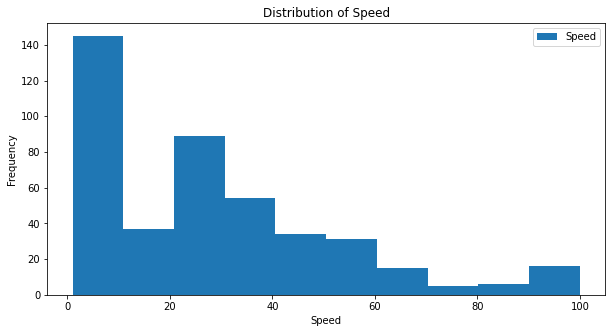

In [ ]:
# Draw histogram for speed of super heroes having fig size 10,5 , provide speed in
# histogram for only good alignment super heroes ,title should be "distribution of
# speed" , xlabel should be "speed"
df2=df.filter("Alignment='good'").select('Name','Speed').sort("Speed",ascending=False).toPandas()
df2.plot.hist(by='Speed',title='Distribution of Speed',figsize=(10,5),xlabel='Speed').set(xlabel='Speed')

[Text(0.5, 0, 'Combat')]

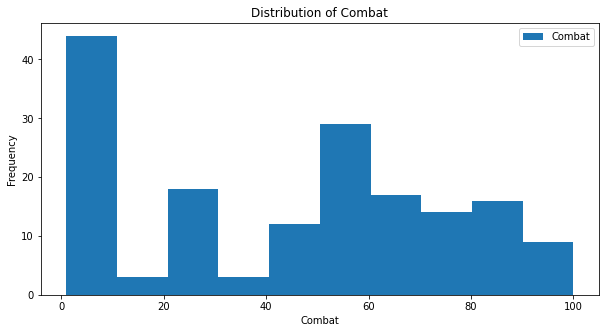

In [ ]:
# Draw a histogram for combat of super villains having fig size 10,5 , provide combat in
# histogram for only bad alignment super heroes ,title should be "distribution of
# combat" , xlabel should be "combat"

df2=df.filter("Alignment='bad'").select('Name','Combat').sort("Combat",ascending=False).toPandas()
df2.plot.hist(by='Combat',title='Distribution of Combat',figsize=(10,5)).set(xlabel='Combat')